In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


In [4]:
df = pd.read_csv("../input/telecom-churn/telecom_churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [5]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [6]:
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [7]:
np.unique(y)

array([0, 1])

In [8]:
np.sum(y)

483

In [9]:
np.sum(1-y)

2850

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [11]:
X_train.shape

(2666, 10)

In [12]:
X_test.shape

(667, 10)

In [13]:
np.sum(y_train)

395

In [14]:
np.sum(1 - y_train)

2271

In [15]:
np.sum(y_test)

88

In [16]:
np.sum(1-y_test)

579

In [21]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))), 
  ('classification', ExtraTreesClassifier(random_state=0))
])

In [24]:
from sklearn.model_selection import GridSearchCV
params = {
    'classification__n_estimators' : [10,30,50,100,300],
}
best_clf = GridSearchCV(clf, params ,cv=10)
best_clf.fit(X_res, y_res)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classification',
                                        ExtraTreesClassifier(random_state=0))]),
             param_grid={'classification__n_estimators': [10, 30, 50, 100,
                                                          300]})

In [25]:
best_clf.best_score_

0.9399007600329187

In [26]:
best_clf.best_params_

{'classification__n_estimators': 50}

In [29]:
y_predict = best_clf.predict(X_test)
acc = sum(y_predict == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.8995502248875562


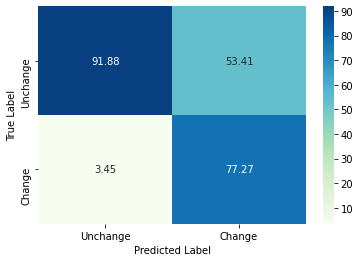

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Unchange', 'Change']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()